In [1]:
import sys
sys.path.append('../../..')
sys.path

['/home/ashesh.ashesh/code/image-restoration-sde/codes/config/splitting/notebooks',
 '/home/ashesh.ashesh/code/Disentangle',
 '/home/ashesh.ashesh/miniconda3/envs/refusion/lib/python310.zip',
 '/home/ashesh.ashesh/miniconda3/envs/refusion/lib/python3.10',
 '/home/ashesh.ashesh/miniconda3/envs/refusion/lib/python3.10/lib-dynload',
 '',
 '/home/ashesh.ashesh/miniconda3/envs/refusion/lib/python3.10/site-packages',
 '../../..']

In [2]:
from data.splitting_dataset import SplittingDataset
import config.splitting.options as option
config_file = '/home/ashesh.ashesh/code/image-restoration-sde/codes/config/splitting/options/train/refusion.yml'
opt = option.parse(config_file, is_train=True)

# convert to NoneDict, which returns None for missing keys
opt = option.dict_to_nonedict(opt)


/home/ashesh.ashesh/miniconda3/envs/refusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


export CUDA_VISIBLE_DEVICES=0
OrderedDict([('optimizer', 'Lion'), ('name', 'Train_Dataset'), ('mode', 'LQGT'), ('fpath', '/group/jug/ashesh/data/microscopy/OptiMEM100x014.tif'), ('use_shuffle', True), ('n_workers', 4), ('batch_size', 4), ('GT_size', 512), ('LR_size', 512), ('color', None), ('channel_1', 2), ('channel_2', 3), ('target_channel_idx', 0), ('ch1_weight', 0.5), ('datasplit_type', 'train'), ('enable_rotation_aug', True), ('enable_random_cropping', True), ('clip_percentile', 0.995), ('channelwise_quantile', False), ('background_quantile', 0.0), ('clip_background_noise_to_zero', False), ('skip_normalization_using_mean', False), ('val_fraction', 0.1), ('test_fraction', 0.1), ('empty_patch_max_val_threshold', 0.0)])
OrderedDict([('name', 'Val_Dataset'), ('mode', 'LQGT'), ('dataroot_GT', '/home/ziwlu/datasets/ntire2023/shadow/val/GT'), ('dataroot_LQ', '/home/ziwlu/datasets/ntire2023/shadow/val/LQ')])


In [3]:
dset = SplittingDataset(opt['datasets']['train'])
mean_val, std_val = dset.compute_mean_std()
dset.set_mean_std(mean_val, std_val)


Loading /group/jug/ashesh/data/microscopy/OptiMEM100x014.tif with Channels 2,3,datasplit mode:Train
[SplittingDataset] Sz:512 Train:1 N:49 NumPatchPerN:25 Ch1w:0.5 NormInp:True SingleNorm:True Rot:True RandCrop:True Q:0.995 ReplaceWithRandSample:False BckQ:0.0


In [4]:
ddict = dset[0]

LQ [-2.366 -1.895 -1.388 -0.833 -0.186]
GT [-2.17  -1.417 -0.743  0.57   1.958]
Other GT [-1.336 -1.224 -1.101 -0.91  -0.771]


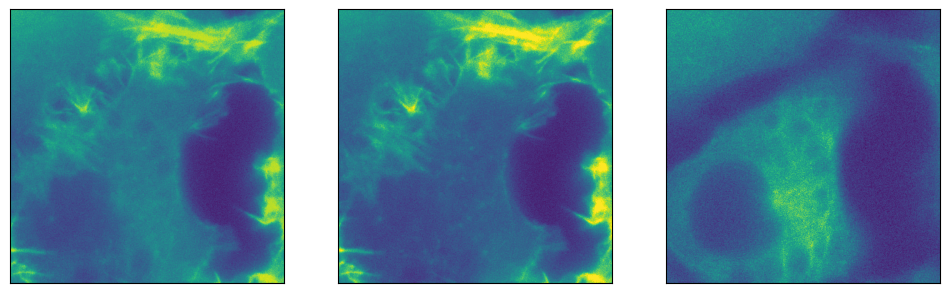

In [5]:
import matplotlib.pyplot as plt
from utils.plot_utils import clean_ax, add_pixel_kde
import numpy as np

_,ax = plt.subplots(figsize=(12,4),ncols=3)
ax[0].imshow(ddict['LQ'][0])
ax[1].imshow(ddict['GT'][0])
w = (1 - dset.ch1_weight) if dset.target_channel_idx == 1 else dset.ch1_weight
other_gt = (ddict['LQ'][0] - w*ddict['GT'][0])
ax[2].imshow(other_gt)
clean_ax(ax)
qs = [0,0.1,0.5, 0.9,0.99]
print('LQ', np.quantile(ddict['LQ'][0], qs).round(3))
print('GT', np.quantile(ddict['GT'][0], qs).round(3))
print('Other GT', np.quantile(other_gt, qs).round(3))


In [13]:
np.quantile(dset._data[...,1], 0.99)

632.0